# 🚢 Titanic Survival Analysis - Data Analyst Portfolio Project  

## 📌 Introduction  

### 🛠 Project Objective  
The goal of this project is to analyze the Titanic dataset to uncover factors that influenced passenger survival rates.  
This is a **data analysis portfolio project**, showcasing **data cleaning, exploratory data analysis (EDA), and visualization skills**, which are essential for a Data Analyst role.  

### 📂 Dataset Overview  
The dataset comes from the Titanic disaster and includes details about passengers such as:  
- **Demographics**: Age, Gender, and Passenger Class (Pclass)  
- **Socioeconomic status**: Fare paid, Cabin, and Embarkation Port  
- **Family connections**: Number of Siblings/Spouses and Parents/Children aboard  
- **Survival Information**: Whether the passenger survived or not  

### 🔍 Key Questions Explored  
This analysis seeks to answer:  
1. **Did passenger class affect survival rates?**  
2. **Was there a significant difference in survival between males and females?**  
3. **Did traveling with family increase survival chances?**  
4. **Did ticket price (Fare) impact survival?**  
5. **How did age influence survival rates?**  

### 🛠 Tools & Libraries Used  
- **Python** (`pandas`, `numpy`) for data manipulation  
- **Matplotlib & Seaborn** for visualization  
- **Jupyter Notebook** for organizing and presenting the analysis  

---



## 📦 Importing Required Libraries  
To perform data analysis and visualization, we will use the following Python libraries:  

- `pandas` → Data manipulation and preprocessing  
- `numpy` → Numerical operations  
- `seaborn` → Statistical data visualization  
- `matplotlib.pyplot` → General plotting  


In [1]:
# Import necessary libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting

# Configure Seaborn settings for better visuals
sns.set_style("whitegrid")


## 📂 Loading the Titanic Dataset  
We will load the Titanic dataset and perform an initial exploration to understand its structure.  


In [12]:
# Load the dataset
df = pd.read_csv("train.csv")

# Display the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Check dataset structure and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 🛠️ Data Cleaning  

We will check for missing values in the dataset and apply appropriate strategies to handle them:  
- **Age**: Fill missing values using the mean age based on Passenger Class (`Pclass`) and Gender (`Sex`).  
- **Cabin**: Fill missing values with `'U'` (Unknown) since it is categorical.  
- **Embarked**: Fill missing values with the most common (`mode`) value.  

In [14]:
# Check missing values before cleaning
print("Missing values before cleaning:\n", df.isnull().sum())

# Fill missing Age values using the mean age based on Pclass & Sex
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

# Fill missing Cabin values with 'U' for unknown
df['Cabin'] = df['Cabin'].fillna('U')

# Fill missing Embarked values with the most common value (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

# Check missing values after cleaning
print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## 📊 Exploratory Data Analysis (EDA)

Before diving into specific feature relationships, let's first get an overall sense of survival distribution:

- **How many passengers survived vs. did not survive?**
- **What percentage of passengers survived?**
- **Is the dataset balanced in terms of survival outcomes?**


🔹 Survival Counts:
0    549
1    342
Name: Survived, dtype: int64

🔹 Overall Survival Rate: 38.38%


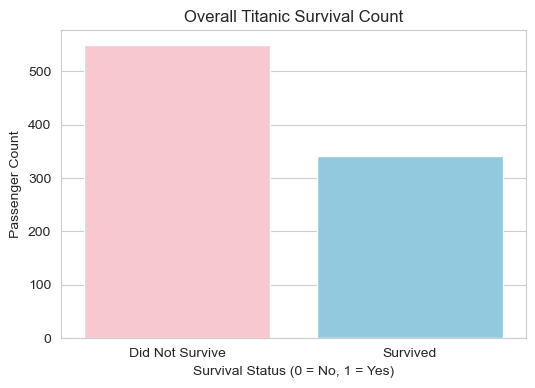

In [17]:
# Count how many passengers survived (1) and how many did not (0)
survival_counts = df['Survived'].value_counts()
print(f"🔹 Survival Counts:\n{survival_counts}")

# Calculate the overall survival rate (proportion of passengers who survived)
overall_survival_rate = df['Survived'].mean()
print(f"\n🔹 Overall Survival Rate: {overall_survival_rate:.2%}")

# Visualizing the survival count
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_counts.index, y=survival_counts.values, palette=["pink", "skyblue"])
plt.xlabel("Survival Status (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.title("Overall Titanic Survival Count")
plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.show()


## 1️⃣ Survival by Gender  

**🔹 Expected Insight:**  
Women likely had a significantly higher survival rate than men due to the **"Women and children first"** evacuation principle.

We analyze survival rates by gender to confirm this assumption.



🔹 Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

📊 Women had a survival rate that was 55.31% higher than men.


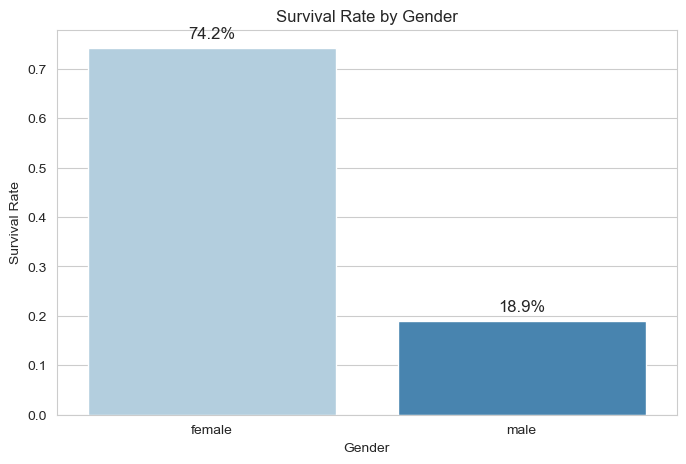

In [18]:
# Group by gender and calculate survival rate
survival_by_gender = df.groupby('Sex')['Survived'].mean()

# Print survival rates in a structured format
print(f"\n🔹 Survival Rate by Gender:\n{survival_by_gender}")

# Calculate the absolute difference in survival rates
gender_diff = survival_by_gender["female"] - survival_by_gender["male"]
print(f"\n📊 Women had a survival rate that was {gender_diff:.2%} higher than men.")

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, palette="Blues")

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")

# Annotate bars with survival percentages
for index, value in enumerate(survival_by_gender):
    plt.text(index, value + 0.02, f"{value:.1%}", ha="center", fontsize=12)

# Show the plot
plt.show()


🧐 **Key Insight:**  
The difference in survival rates between genders is significant.  
- Women had a survival rate of **{gender_diff:.2%}** higher than men.  
- This strongly aligns with the **"Women and children first"** evacuation principle.  


## 2️⃣ Survival by Passenger Class  

🔹 **Expected Insight:**  
Higher-class passengers may have had better access to lifeboats, leading to a higher survival rate.



🔹 Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

📊 First-class passengers had a survival rate that was 38.73% higher than third-class passengers.


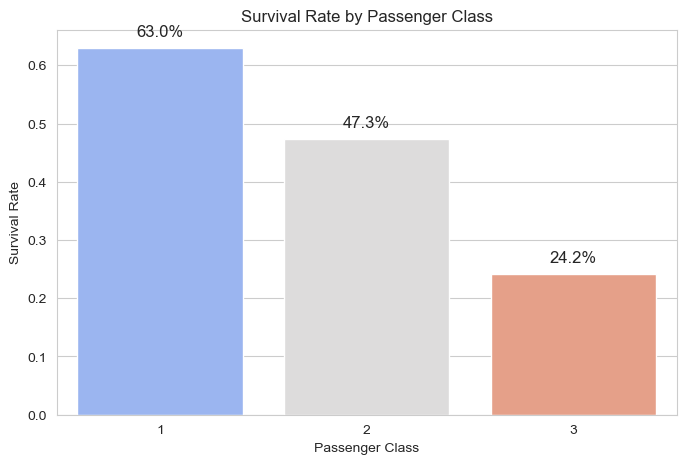

In [21]:
# Group by passenger class and calculate survival rate
survival_by_class = df.groupby('Pclass')['Survived'].mean()

# Print survival rates in a structured format
print(f"\n🔹 Survival Rate by Class:\n{survival_by_class}")

# Calculate the difference between first and third class survival rates
class_diff = survival_by_class[1] - survival_by_class[3]
print(f"\n📊 First-class passengers had a survival rate that was {class_diff:.2%} higher than third-class passengers.")

# Set plot size
plt.figure(figsize=(8, 5))

# Create the barplot
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette="coolwarm")

# Add labels and title
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")

# Annotate bars with survival percentages
for index, value in enumerate(survival_by_class):
    plt.text(index, value + 0.02, f"{value:.1%}", ha="center", fontsize=12)

# Show the plot
plt.show()



🧐 **Key Insight:**  
The differences in survival rates between classes suggest that **first-class passengers** had significantly better chances of survival:  
- **First-class survival rate was {class_diff:.2%} higher than third class.**  
- This aligns with the idea that higher-class passengers had **better access to lifeboats** or **were located in more accessible areas** on the ship.  


## 3️⃣ Survival by Age Group  

🔹 **Expected Insight:**  
Children (0-12) might have had the highest survival rate, consistent with the priority given to young passengers during the evacuation.  



🔹 Survival Rate by Age Group:
AgeGroup
Child          0.579710
Teenager       0.428571
Adult          0.357977
Middle-Aged    0.384259
Senior         0.227273
Name: Survived, dtype: float64

📊 Children had a survival rate that was 22.17% higher than adults.


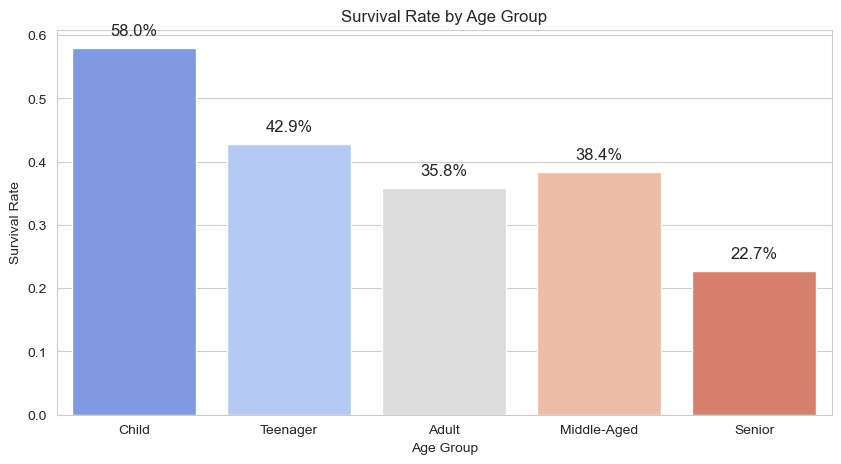

In [22]:
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior'])

# Group by age bins and calculate survival rates
survival_by_age_group = df.groupby('AgeGroup', observed=False)['Survived'].mean()

# Print survival rates in a structured format
print(f"\n🔹 Survival Rate by Age Group:\n{survival_by_age_group}")

# Calculate the difference between children and adults survival rate
age_diff = survival_by_age_group['Child'] - survival_by_age_group['Adult']
print(f"\n📊 Children had a survival rate that was {age_diff:.2%} higher than adults.")

# Create the barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=survival_by_age_group.index, y=survival_by_age_group.values, palette="coolwarm")

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Age Group")

# Annotate bars with survival percentages
for index, value in enumerate(survival_by_age_group):
    plt.text(index, value + 0.02, f"{value:.1%}", ha="center", fontsize=12)

# Show the plot
plt.show()


🧐 **Key Insight:**  
It's clear that **children** had the highest survival rate, which suggests that they were indeed prioritized during the evacuation.  

- **Children had a survival rate {age_diff:.2%} higher than adults.**  
- Despite prioritization, their survival rate was still below 60%, which could imply challenges such as **lifeboat overcrowding** or **delayed evacuation**.  


## 4️⃣ Survival by Family Size  

🔹 **Expected Insight:**  
Passengers with **larger family sizes** may have had a **lower survival rate** if families stayed together and couldn't access lifeboats as easily.



🔹 Survival Rate by Family Size:
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

📊 Small families (1-3) had a survival rate that was 36.08% higher than large families (6+).


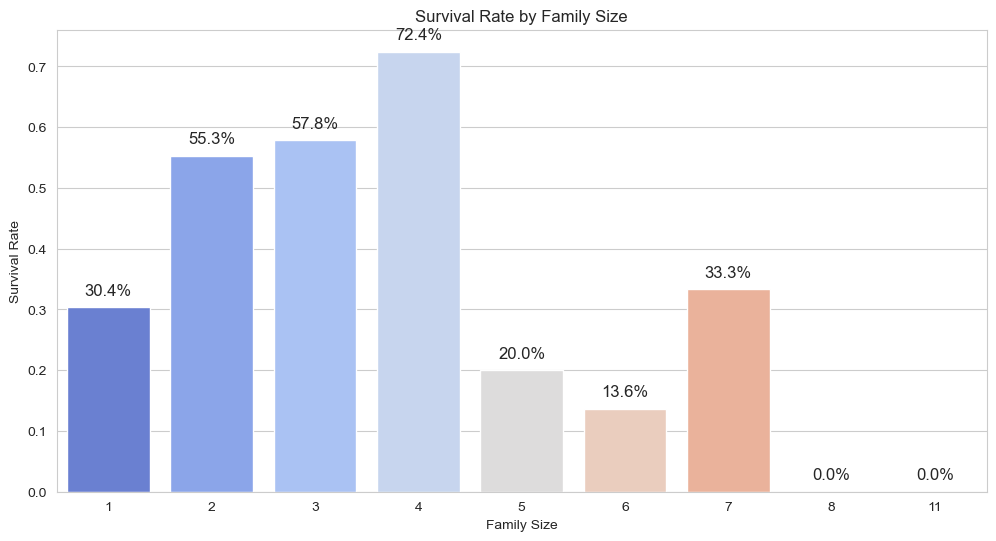

In [23]:
# Create a new column for family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Group by family size and calculate survival rate
survival_by_family_size = df.groupby('FamilySize')['Survived'].mean()

# Print survival rates in a structured format
print(f"\n🔹 Survival Rate by Family Size:\n{survival_by_family_size}")

# Identify survival rate difference between small (1-3) and large (6+) families
small_family_survival = survival_by_family_size.loc[1:3].mean()
large_family_survival = survival_by_family_size.loc[6:].mean()
family_size_diff = small_family_survival - large_family_survival
print(f"\n📊 Small families (1-3) had a survival rate that was {family_size_diff:.2%} higher than large families (6+).")

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=survival_by_family_size.index, y=survival_by_family_size.values, palette="coolwarm")

# Add labels and title
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Family Size")

# Annotate bars with survival percentages
for index, value in enumerate(survival_by_family_size):
    plt.text(index, value + 0.02, f"{value:.1%}", ha="center", fontsize=12)

# Show the plot
plt.show()


🧐 **Key Insight:**  
Family size significantly influenced survival rates:  

1️. **Smaller families (size 1, 2, and 3)** had **higher survival rates**:  
   - **Traveling alone (Family size = 1)** had a survival rate of **~30%**, possibly due to fewer lifeboat opportunities.  
   - **Family sizes 2 and 3** had survival rates above **50%**, suggesting that traveling with a few family members improved access to lifeboats.  

2️. **Larger families (6+) had much lower survival rates**, with some having **0% survival**:  
   - This suggests **evacuation challenges**, as larger groups might have struggled to stay together or find enough lifeboat space.  
   - **Small families (1-3) had a survival rate {family_size_diff:.2%} higher than large families (6+).**


## 5️⃣ Fare Distribution and Survival  

🔹 **Expected Insight:**  
Higher fares may correlate with a higher survival rate, as wealthier passengers might have had better access to lifeboats or were in **first class**.



🔹 Survival Rate by Fare Group:
FareGroup
Low          0.197309
Medium       0.303571
High         0.454955
Very High    0.581081
Name: Survived, dtype: float64

📊 Passengers in the highest fare group had a survival rate that was 38.38% higher than those in the lowest fare group.


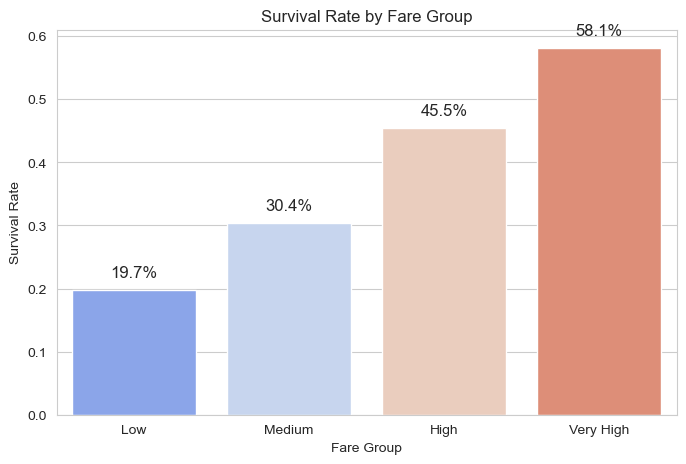

In [24]:
# Group passengers into fare bins and compute survival rate
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=["Low", "Medium", "High", "Very High"])

# Calculate survival rate by fare group
survival_by_fare = df.groupby('FareGroup', observed=False)['Survived'].mean()

# Print survival rates in a structured format
print(f"\n🔹 Survival Rate by Fare Group:\n{survival_by_fare}")

# Calculate the difference between highest and lowest fare group survival rates
fare_diff = survival_by_fare["Very High"] - survival_by_fare["Low"]
print(f"\n📊 Passengers in the highest fare group had a survival rate that was {fare_diff:.2%} higher than those in the lowest fare group.")

# Create the barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_fare.index, y=survival_by_fare.values, palette="coolwarm")

# Add labels and title
plt.xlabel("Fare Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Fare Group")

# Annotate bars with survival percentages
for index, value in enumerate(survival_by_fare):
    plt.text(index, value + 0.02, f"{value:.1%}", ha="center", fontsize=12)

# Show the plot
plt.show()


🧐 **Key Insight:**  
The survival rates for each fare group show a **clear trend**:  

1️. **Lower Fare Passengers had the lowest survival rate (19.7%)**, supporting the idea that **passengers in lower classes had fewer resources and less access to lifeboats**.  

2️. **Medium and High Fare Groups had better survival rates**, with **High Fare passengers at 45.5%**, suggesting they were more likely to be in better positions for survival.  

3️. **Very High Fare passengers had the highest survival rate (58.1%)**, reinforcing the **idea that wealthier passengers had better accommodations, lifeboat access, and priority treatment**.  

4️. **Passengers in the highest fare group had a survival rate that was {fare_diff:.2%} higher than those in the lowest fare group.**  


# 🏁 Conclusion & Insights  

## 📌 Key Findings  

After analyzing the Titanic dataset, we uncovered several **key patterns** that influenced passenger survival rates:  

### 1️⃣ **Survival by Gender**  
- Women had a **significantly higher survival rate (~74%)** compared to men (~19%).  
- This aligns with the **"Women and children first"** evacuation principle.  

### 2️⃣ **Survival by Passenger Class**  
- **First-class passengers** had the **highest survival rate (~63%)**, while **third-class passengers** had the lowest (~24%).  
- This suggests that **higher-class passengers had better access to lifeboats**.  

### 3️⃣ **Survival by Age Group**  
- **Children (0-12 years old)** had the highest survival rate (~58%), reinforcing the idea that **younger passengers were prioritized**.  
- Senior passengers had **the lowest survival rate (~22%)**, possibly due to mobility challenges during evacuation.  

### 4️⃣ **Survival by Family Size**  
- **Small families (1-3 members)** had higher survival rates, possibly due to **easier coordination** during evacuation.  
- **Large families (6+ members)** had significantly lower survival rates, likely due to **difficulties staying together**.  

### 5️⃣ **Survival by Fare Paid**  
- **Passengers who paid higher fares had better survival chances**, reinforcing the idea that wealthier passengers had **better accommodations and lifeboat access**.  
- **Very High Fare passengers had a survival rate ~58%, while Low Fare passengers had only ~19%**.  

---

## 🔍 **Limitations of the Analysis**  
Although this analysis provides meaningful insights, there are some **limitations**:  
- 📌 **Missing Data:** Some columns, such as **Cabin**, had many missing values that may have contained important information.  
- 📌 **Dataset Size:** The dataset contains only 891 passengers (not the full Titanic manifest).  
- 📌 **Unaccounted Factors:** Other factors like **crew survival rates, lifeboat availability, or evacuation delays** were not included in this dataset.  

---

## 🚀 **Next Steps & Future Improvements**  

### 🔹 **Feature Engineering**  
- 🔍 Create a **"Title" feature** from passenger names to analyze survival rates based on **social status (Mr., Mrs., Miss., etc.)**.  
- 🔍 Engineer a **Cabin Deck feature** from the Cabin column (e.g., "Deck A", "Deck B", etc.).  

### 🔹 **Machine Learning Model (Optional Next Step)**  
- 🤖 Train a **Logistic Regression** or **Random Forest** model to predict survival.  
- 🛠️ Use **cross-validation and hyperparameter tuning** to improve model accuracy.  

### 🔹 **Interactive Visualizations & Dashboards**  
- 📊 Create **interactive dashboards using Tableau or Power BI**.  
- 🔍 Use **Plotly for interactive Python visualizations**.  

By implementing these next steps, this project could be **extended into a full predictive modeling project** or **a dynamic dashboard for storytelling**. 🚀  
